In [ ]:
!pip install --upgrade pandas



In [ ]:
!pip install datasets


In [ ]:
import pandas as pd
from datasets import load_dataset

dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()
# df

# Data Cleaning
df.job_posted_date[0]


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

data_jobs.csv:   0%|          | 0.00/231M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/785741 [00:00<?, ? examples/s]

'2023-06-16 13:44:15'

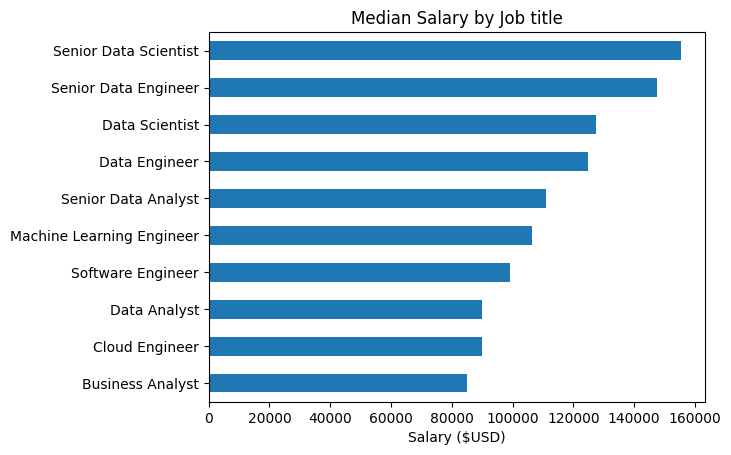

In [ ]:
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
job_salary = df.groupby("job_title_short")["salary_year_avg"].median().sort_values()
job_salary.plot(kind="barh")
plt.xlabel("Salary ($USD)")
plt.title("Median Salary by Job title")
plt.ylabel("")
plt.show()


In [ ]:
df.job_posted_date.dt.month #in order to analyze monthly
df["job_posted_month"] = df.job_posted_date.dt.month

# Sorting in ascending order by date
df.sort_values(by="job_posted_date", inplace=True)

# Remove salary_hour_avg column
df.drop(labels="salary_hour_avg", axis=1, inplace=True)
# df.info()

# Remove columns without value
df.dropna(subset=["salary_year_avg"], inplace=True) # should be a list when using subset(use bracket notation)
# df

# Data Analyzing
# df.describe()
# df.info()
# df.count()
# df["salary_year_avg"].mean()
# df["salary_year_avg"].median()
# df["salary_year_avg"].max()
# df["salary_year_avg"].min()
# df["salary_year_avg"].std()
# min_salary = df['salary_year_avg'].idxmin()
# print(f"Index of minimum salary: {min_salary}")  # Should print a valid index
# print(df['salary_year_avg'].isnull().sum())  # Count missing values
# print(df.empty)
# print(df['salary_year_avg'].empty)
# print(df['salary_year_avg'].dtype)  # Ensure it's numeric (e.g., float64 or int64)
# print(df['salary_year_avg'].isnull().sum())
# print((df['salary_year_avg'] == float('inf')).sum())  # Count positive infinities
# print((df['salary_year_avg'] == float('-inf')).sum())  # Count negative infinities

In [ ]:
df = df.reset_index(drop=True)
min_salary = df['salary_year_avg'].idxmin()

In [ ]:
df.iloc[min_salary]

,20976
job_title_short,Data Engineer
job_title,Data Engineer - Hadoop
job_location,Brazil
job_via,via LinkedIn
job_schedule_type,Full-time
job_work_from_home,False
search_location,Brazil
job_posted_date,2023-12-09 10:05:30
job_no_degree_mention,True
job_health_insurance,False


In [ ]:
df["job_title_short"].unique()

array(['Data Scientist', 'Data Engineer', 'Business Analyst',
       'Data Analyst', 'Senior Data Engineer', 'Senior Data Scientist',
       'Senior Data Analyst', 'Software Engineer',
       'Machine Learning Engineer', 'Cloud Engineer'], dtype=object)

In [ ]:
df["job_title_short"].value_counts()

,count
job_title_short,
Data Scientist,5922
Data Analyst,5451
Data Engineer,4500
Senior Data Scientist,1690
Senior Data Engineer,1591
Senior Data Analyst,1131
Business Analyst,610
Machine Learning Engineer,576
Software Engineer,467


In [ ]:
 df.groupby( "job_title_short")["salary_year_avg"].agg(["min", "max", "median", "mean"])

,min,max,median,mean
job_title_short,,,,
Business Analyst,16500.0,387460.0,85000.0,91082.612833
Cloud Engineer,42000.0,280000.0,90000.0,111268.453846
Data Analyst,25000.0,650000.0,90000.0,93841.907854
Data Engineer,15000.0,525000.0,125000.0,130125.604250
Data Scientist,27000.0,960000.0,127500.0,135988.837171
Machine Learning Engineer,30000.0,325000.0,106415.0,126774.315972
Senior Data Analyst,30000.0,425000.0,111175.0,113911.363665
Senior Data Engineer,35000.0,425000.0,147500.0,145840.611624
Senior Data Scientist,45000.0,890000.0,155500.0,154206.292996


In [ ]:
df.groupby("job_title_short") ["salary_year_avg"].describe()

,count,mean,std,min,25%,50%,75%,max
job_title_short,,,,,,,,
Business Analyst,610.0,91082.612833,32036.098388,16500.0,70320.0,85000.0,105000.000,387460.0
Cloud Engineer,65.0,111268.453846,50514.351080,42000.0,79200.0,90000.0,136000.000,280000.0
Data Analyst,5451.0,93841.907854,34100.108034,25000.0,70000.0,90000.0,111175.000,650000.0
Data Engineer,4500.0,130125.604250,42525.929674,15000.0,100000.0,125000.0,147500.000,525000.0
Data Scientist,5922.0,135988.837171,52227.832196,27000.0,100000.0,127500.0,158917.875,960000.0
Machine Learning Engineer,576.0,126774.315972,53914.993342,30000.0,80850.0,106415.0,166000.000,325000.0
Senior Data Analyst,1131.0,113911.363665,34060.065096,30000.0,92500.0,111175.0,125000.000,425000.0
Senior Data Engineer,1591.0,145840.611624,37415.120392,35000.0,125000.0,147500.0,167174.000,425000.0
Senior Data Scientist,1690.0,154206.292996,50927.738257,45000.0,125000.0,155500.0,174000.000,890000.0


In [ ]:
kenyan_jobs = df[df["job_country"] == "Kenya"] # filter kenyan jobs)

In [ ]:
kenyan_jobs[kenyan_jobs["salary_year_avg"].notna()] #returns only non NaN jobs

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,company_name,job_skills,job_type_skills,job_posted_month
1801,Data Analyst,Data Operations Coordinator,"Eldoret, Kenya",via Ai-Jobs.net,Full-time,False,Kenya,2023-01-25 02:46:02,False,False,Kenya,year,44100.0,Assent,"['go', 'sql', 'r', 'python', 'excel', 'flow']","{'analyst_tools': ['excel'], 'other': ['flow']...",1
10220,Data Analyst,Junior Data Analyst,Anywhere,via Remote OK,Full-time,True,Kenya,2023-05-31 07:37:04,False,False,Kenya,year,60000.0,TalentKompass Deutschland,None,None,5
13122,Data Analyst,Marketing Insights Data Analyst,Kenya,via Ai-Jobs.net,Full-time,False,Kenya,2023-07-07 15:24:21,False,False,Kenya,year,105000.0,Wasoko,"['sql', 'r', 'python', 'excel', 'tableau']","{'analyst_tools': ['excel', 'tableau'], 'progr...",7
14202,Senior Data Analyst,Senior Data Analyst,"Nairobi, Kenya",via Ai-Jobs.net,Full-time,False,Kenya,2023-07-21 10:48:28,False,False,Kenya,year,111175.0,KOKO Networks,"['sql', 'r', 'python', 'tableau', 'looker', 'e...","{'analyst_tools': ['tableau', 'looker', 'excel...",7
16126,Data Engineer,Data Engineering Manager,Kenya,via Ai-Jobs.net,Full-time,False,Kenya,2023-08-21 12:31:24,True,False,Kenya,year,147500.0,Wasoko,"['gcp', 'bigquery', 'redshift', 'kafka', 'airf...","{'analyst_tools': ['looker', 'tableau', 'power...",8
16273,Business Analyst,Vehicle Systems Engineer,"Machakos, Kenya",via JOIN,Full-time,False,Kenya,2023-08-23 08:31:15,False,False,Kenya,year,36000.0,Recruitment Room,"['python', 'sql', 'javascript', 'excel']","{'analyst_tools': ['excel'], 'programming': ['...",8
16407,Software Engineer,Principal Software Engineer,"Nairobi, Kenya",via JOIN,Full-time,False,Kenya,2023-08-24 17:50:57,False,False,Kenya,year,66000.0,Recruitment Room,"['nosql', 'sql', 'java', 'spring']","{'libraries': ['spring'], 'programming': ['nos...",8
20846,Senior Data Analyst,Senior Data Analyst,"Nairobi, Kenya",via Ai-Jobs.net,Full-time,False,Kenya,2023-12-06 16:28:30,True,False,Kenya,year,118640.0,Tala,"['sql', 'python']","{'programming': ['sql', 'python']}",12


In [ ]:
kenyan_jobs.groupby("job_title_short") ["salary_year_avg"].agg(["count", "min", "max", "mean", "median"]).sort_values(by="median", ascending=False)

,count,min,max,mean,median
job_title_short,,,,,
Data Engineer,1,147500.0,147500.0,147500.0,147500.0
Senior Data Analyst,2,111175.0,118640.0,114907.5,114907.5
Software Engineer,1,66000.0,66000.0,66000.0,66000.0
Data Analyst,3,44100.0,105000.0,69700.0,60000.0
Business Analyst,1,36000.0,36000.0,36000.0,36000.0


In [ ]:
# Matplotlib
# !pip list
import matplotlib.pyplot as plt
import numpy as np


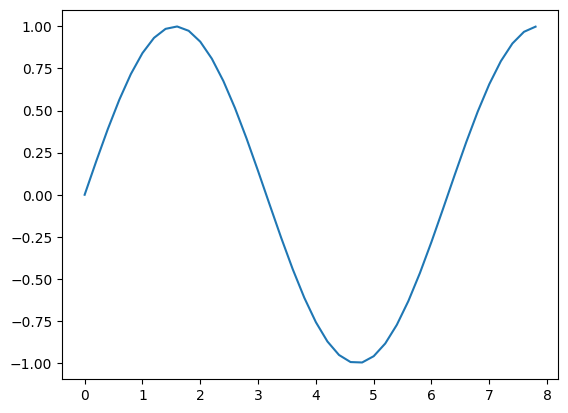

In [ ]:
x = np.arange(0, 8, 0.2)
y = np.sin(x)
plt.plot(x, y)

In [ ]:
df.job_posted_date.head()

,job_posted_date
0,2023-01-01 00:02:56
1,2023-01-01 00:06:13
2,2023-01-01 00:17:55
3,2023-01-01 00:17:58
4,2023-01-01 00:21:09


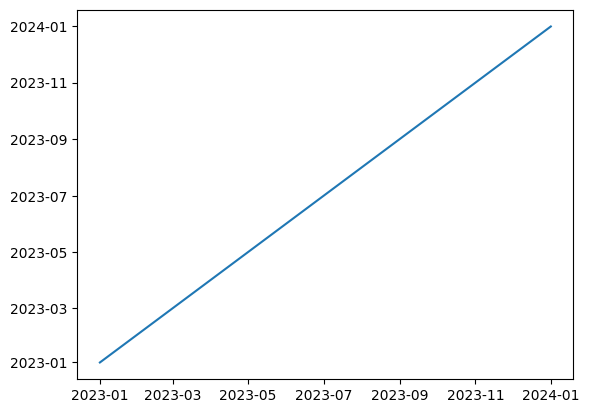

In [ ]:
plt.plot(df.job_posted_date, df.job_posted_date)

[]

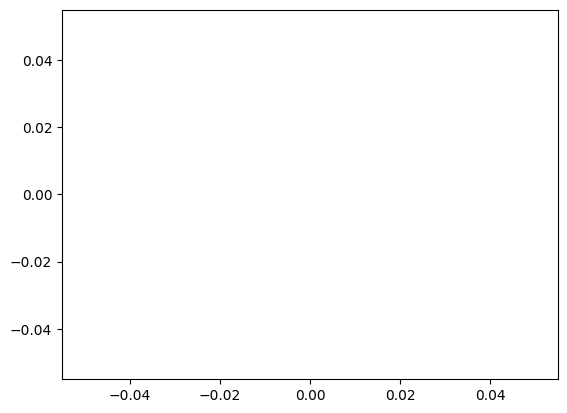

In [ ]:
date_counts = df.job_posted_date.value_counts()
plt.plot()

In [ ]:
date_counts

,count
job_posted_date,
2023-08-08 11:03:47,5
2023-01-11 06:05:08,5
2023-01-11 06:05:10,5
2023-07-28 13:38:33,4
2023-09-25 23:04:51,3
...,...
2023-04-15 19:03:50,1
2023-04-15 19:00:12,1
2023-04-15 17:38:27,1


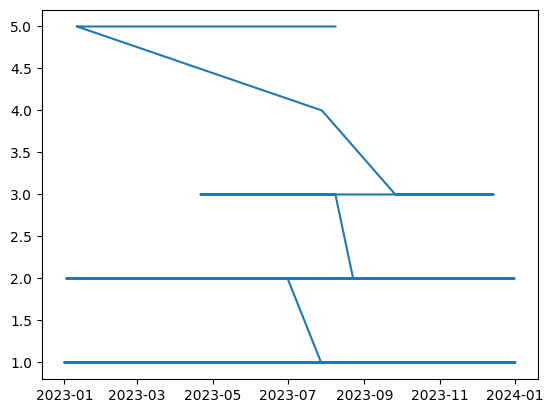

In [ ]:
plt.plot(date_counts.index, date_counts)

In [ ]:
df["job_posted_month"] = df["job_posted_date"].dt.month
# part B pulls out the month e.g 1,2 etc, then stores in part A. which is then created in the df as a column with numerical number of months e.g 1-12
monthly_counts = df.job_posted_month.value_counts()
monthly_counts = monthly_counts.sort_index()
monthly_counts

,count
job_posted_month,
1,2296
2,2010
3,2204
4,1876
5,1911
6,2331
7,2219
8,2095
9,1246


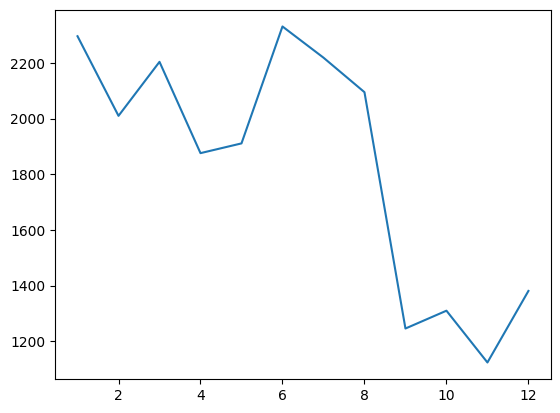

In [ ]:
plt.plot(monthly_counts.index, monthly_counts)
#  x - number of months(that were stored in the new column)  y-number of jobs posted on that month

In [ ]:
# BAR CHART
my_jobs = df.job_title_short.value_counts()

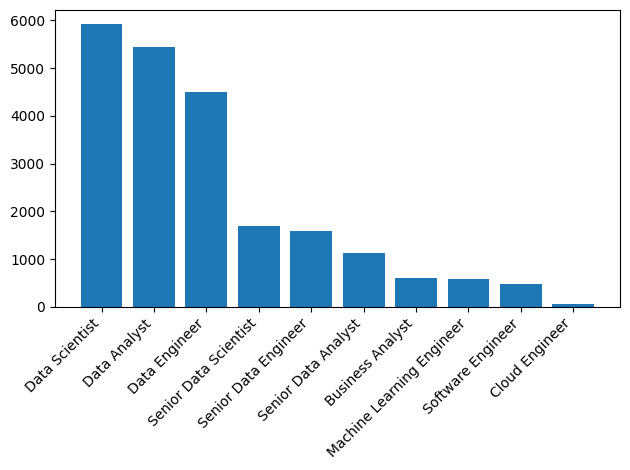

In [ ]:
plt.bar(my_jobs.index, my_jobs)
# plt.title("Posting by Job Title")
# plt.xlabel("Job Title")
# plt.ylabel("Job Postings")
plt.xticks(rotation=45, ha="right") #aligns the misalignments in x axis
plt.tight_layout() #prevents overlaps
# plt.show()

In [ ]:
print(my_jobs.head())
print(type(my_jobs))


job_title_short
Data Scientist           5922
Data Analyst             5451
Data Engineer            4500
Senior Data Scientist    1690
Senior Data Engineer     1591
Name: count, dtype: int64
<class 'pandas.core.series.Series'>


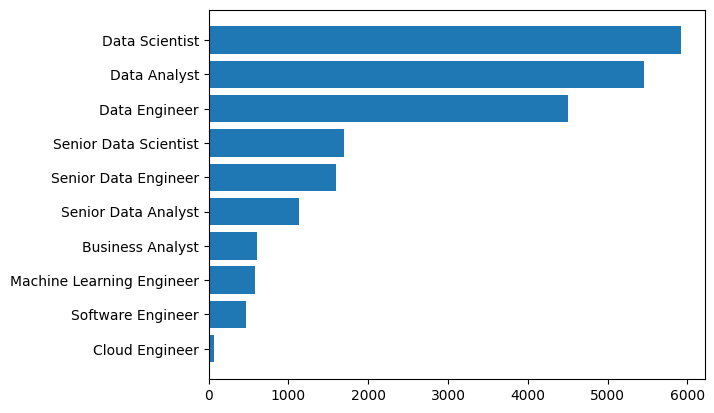

In [ ]:
# my_jobs = my_jobs.sort_values(ascending=True)
# plt.barh(my_jobs.index, my_jobs,)
# plt.show()

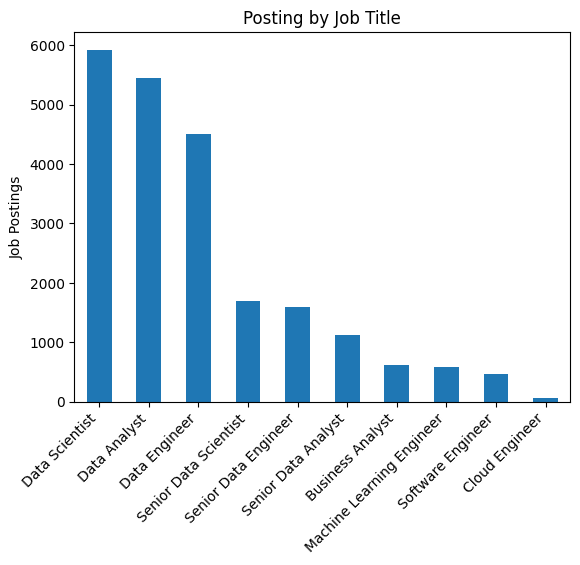

In [ ]:
# Ploting using Pandas
my_jobs.plot(kind="bar")
plt.title("Posting by Job Title")
plt.xlabel("")
plt.ylabel("Job Postings")
plt.xticks(rotation=45, ha="right")
plt.show()


<Axes: xlabel='job_posted_month'>

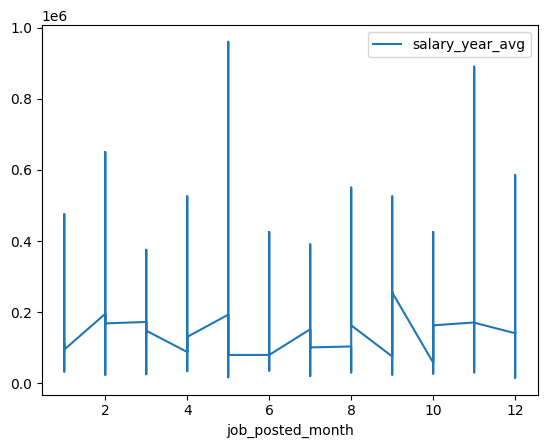

In [ ]:
# monthly_counts
df.plot(x="job_posted_month", y="salary_year_avg", kind="line" )
# df.info()
# df.job_posted_month